In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import os
from pathlib import Path
import numpy as np
import itertools

In [2]:
paths = [
    fr'/Users/liucheng/Desktop/Flow cytometry/practical data/GLu or RAAF pregrown_0.2GAL induction_911_937_timepoints(min)/*.csv',
    fr'/Users/liucheng/Desktop/Flow cytometry/practical data/GLu or RAAF pregrown_2GAL induction_911_937_timepoints(min)/*.csv',
    fr'/Users/liucheng/Desktop/Flow cytometry/practical data/extra/0.2GAL induction/*.csv',
    fr'/Users/liucheng/Desktop/Flow cytometry/practical data/extra/2GAL induction/*.csv',
    
]

#select one of the induction experiments
i=1

files=sorted(glob(paths[i]))

# show example naming format


Path(files[0]).stem

'911_2GLU2GAL_T0'

In [3]:
dfs=[]

for file in files:

    #get meta-data from filename for two induction experiments
    strain, condition, time = Path(file).stem.split('_')
    time = float(time[1:])

    #load data in pandas dataframe and add meta-data to frame
    df=pd.read_csv(file)
    df['strain']=strain
    df['condition']=condition
    df['time']=time
    dfs.append(df)
    
comb_df=pd.concat(dfs).reset_index(drop=True)
comb_df = comb_df[comb_df.columns[1:]]

In [4]:
# to scale absolute fluorescence values to a concentration, divide each cell's fluorescence value
# by that cell's FSC value.
comb_df['FarRed_norm'] = comb_df['FarRed-561nm-A'] / comb_df['FSC-A']

In [5]:
#select which strain/ condition and timepoint
sel_strain=comb_df['strain'].unique()[0]
sel_condition=comb_df['condition'].unique()[0]
sel_time=sorted(comb_df['time'].unique())[0]

print(f'selected strain: {sel_strain}, to/from: {sel_condition}, at timepoint: {sel_time}')

selected strain: 911, to/from: 2GLU2GAL, at timepoint: 0.0


In [6]:
sorted(comb_df['time'].unique())

[0.0,
 15.0,
 30.0,
 45.0,
 60.0,
 75.0,
 90.0,
 105.0,
 120.0,
 135.0,
 150.0,
 165.0,
 180.0,
 195.0,
 210.0,
 225.0,
 240.0]

In [7]:
comb_df[
    (comb_df['strain']==sel_strain) 
    & (comb_df['condition']==sel_condition)
    & (comb_df['time']==sel_time)
]


,FSC-H,FSC-A,SSC-H,SSC-A,GFP-488nm-H,GFP-488nm-A,Red-488nm-H,Red-488nm-A,CFP-405nm-H,CFP-405nm-A,...,RFP-561nm-H,RFP-561nm-A,FarRed-561nm-H,FarRed-561nm-A,FSC-Width,Time,strain,condition,time,FarRed_norm
0,413793.4,442569.7,351497.3,349336.2,1550.2,1208.7,631.9,497.1,372.4,100.8,...,288.9,-12.6,341.3,291.2,1095.21500,0.0,911,2GLU2GAL,0.0,0.000658
1,159114.0,157085.3,93190.7,89524.6,583.7,799.6,191.9,-120.0,561.2,118.7,...,333.1,-114.8,363.7,-125.9,1010.95480,165.0,911,2GLU2GAL,0.0,-0.000801
2,275499.3,367959.1,259469.9,288535.5,1896.9,1699.6,457.6,208.1,475.4,331.6,...,361.6,186.7,334.4,219.4,1367.67870,198.0,911,2GLU2GAL,0.0,0.000596
3,170112.3,169334.6,105764.1,101412.8,1030.2,598.5,271.1,30.9,335.5,-51.6,...,393.3,52.7,342.0,105.9,1019.31680,315.0,911,2GLU2GAL,0.0,0.000625
4,149320.5,155168.7,95344.3,92098.0,1001.0,659.5,368.8,434.9,406.7,2.8,...,400.6,137.5,380.4,595.9,1064.10750,398.0,911,2GLU2GAL,0.0,0.003840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,297824.1,350215.2,195132.4,219326.4,1804.5,1626.9,489.8,534.1,431.9,275.1,...,394.8,210.5,283.3,-35.5,1204.13450,3383972.0,911,2GLU2GAL,0.0,-0.000101
49996,254194.9,274234.5,191784.8,192412.7,1407.1,1179.5,358.3,252.4,359.5,81.5,...,420.3,232.7,241.6,-19.5,1104.74020,3384084.0,911,2GLU2GAL,0.0,-0.000071
49997,223807.8,217630.5,131749.0,127703.9,1050.2,845.2,303.7,202.1,601.6,-26.4,...,348.4,-205.4,209.7,73.2,995.77136,3384113.0,911,2GLU2GAL,0.0,0.000336
49998,498340.6,637871.0,399164.4,469059.1,2169.9,2302.1,618.8,561.6,663.2,106.6,...,418.4,387.7,299.6,49.5,1310.72190,3384142.0,911,2GLU2GAL,0.0,0.000078


In [8]:
# looping through samples and timepoints:

channel = 'FarRed_norm' 

means = pd.DataFrame()

for sel_strain in comb_df['strain'].unique():
    for sel_condition in comb_df['condition'].unique():
        sample_means = []
        for sel_time in sorted(comb_df['time'].unique()[:-1]):
        
            df = comb_df[
                (comb_df['strain']==sel_strain) 
                & (comb_df['condition']==sel_condition)
                & (comb_df['time']==sel_time)
            ]

            # allow only positive values
            df = df[(df[channel]>0)]


            mean = np.mean(np.log(df[channel]))
            sample_means.append(mean)

        means[f'{sel_strain}, {sel_condition}'] = sample_means

In [9]:
# and let's add the times
means['time'] = sorted(comb_df['time'].unique())[:-1]

In [10]:
# inspect
means.head()
means.tail()

,"911, 2GLU2GAL","911, 2RAF2GAL","937, 2GLU2GAL","937, 2RAF2GAL",time
11,-7.350140,-1.767194,-6.357215,-6.434736,165.0
12,-7.279788,-1.674853,-6.360690,-6.492602,180.0
13,-7.174006,-1.608080,-6.350601,-6.504963,195.0
14,-7.057792,-1.518204,-6.353610,-6.487521,210.0
15,-6.946010,-1.461383,-6.349916,-6.518168,225.0


In [11]:
means.columns
colors=['red','darkred','blue','black']

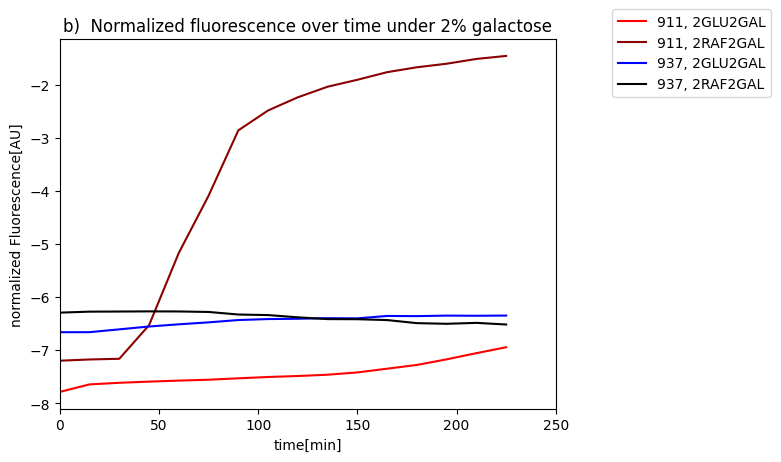

In [12]:
# your code here
fig, ax = plt.subplots(facecolor='white')

#change the value inside the set_index function
means.set_index(['time']).plot(color=colors, ax=ax)

# Change to location of the legend. 
plt.legend(bbox_to_anchor=(1.1, 1.1), bbox_transform=ax.transAxes)
ax.set_title('b)  Normalized fluorescence over time under 2% galactose')
ax.set_ylabel('normalized Fluorescence[AU]')
ax.set_xlabel('time[min]')
ax.set_xlim(0,250)

#uncomment the line below to save the image
plt.savefig('flowcyto_over_time_green_2.png')

In [13]:
sel_strain='911' # fill in which strain you want to look at
sel_condition='2RAF2GAL' # fill in which condition you want to look at

In [14]:
df = comb_df[
            (comb_df['strain']==sel_strain) 
            & (comb_df['condition']==sel_condition)
            & (comb_df['time']==0) # the first time point is selected
]

/Users/liucheng/opt/anaconda3/envs/quant/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/liucheng/opt/anaconda3/envs/quant/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 0, 'fluorescence (log)')

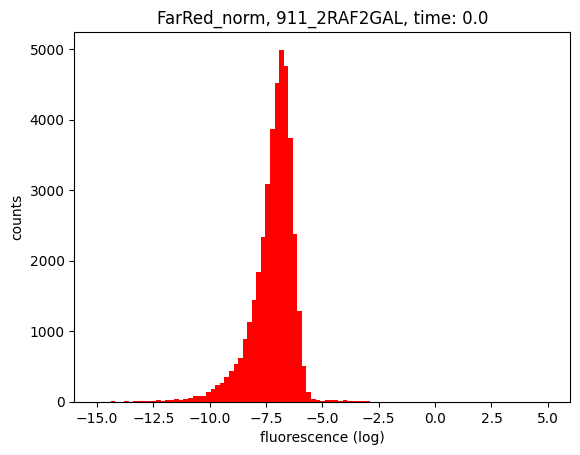

In [15]:
plt.hist(np.log(df[channel]), bins=np.linspace(-15,5, 100), color='red'); 
# np.linspace(0,15,100) gives us 100 evenly spaced values between 0 and 15

plt.title(f'{channel}, {df.strain.values[0]}_{df.condition.values[0]}, time: {df.time.values[0]}')
plt.ylabel('counts')
plt.xlabel('fluorescence (log)')

Text(0.5, 0, 'fluorescence (log)')

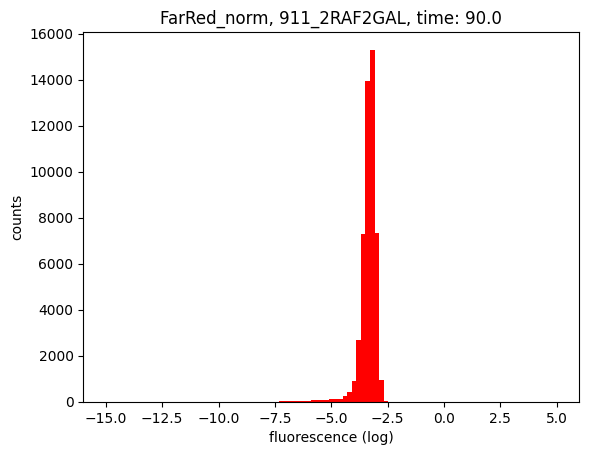

In [16]:
df = comb_df[
            (comb_df['strain']==sel_strain) 
            & (comb_df['condition']==sel_condition)
            & (comb_df['time']==90) # timepoint at 90 mins is selected.
]

# let's now look at a later timepoint
plt.hist(np.log(df[channel]), bins=np.linspace(-15, 5, 100), color='red'); 

# np.linspace(0,15,100) gives us 100 evenly spaced values between 0 and 15

plt.title(f'{channel}, {df.strain.values[0]}_{df.condition.values[0]}, time: {df.time.values[0]}')
plt.ylabel('counts')
plt.xlabel('fluorescence (log)')

In [17]:
def clean_up_mulitplot(axes,y,x):
    #cleaning up the figure
    #add title headings to the top of the column and remove ticklabels
    if y==0:
        axes[y,x].set_title(f'{strain}: {condition}')

    if x!=0:
        axes[y,x].set_yticklabels('')

    if y!=len(comb_df.time.unique())-1:
        axes[y,x].set_xticklabels('')

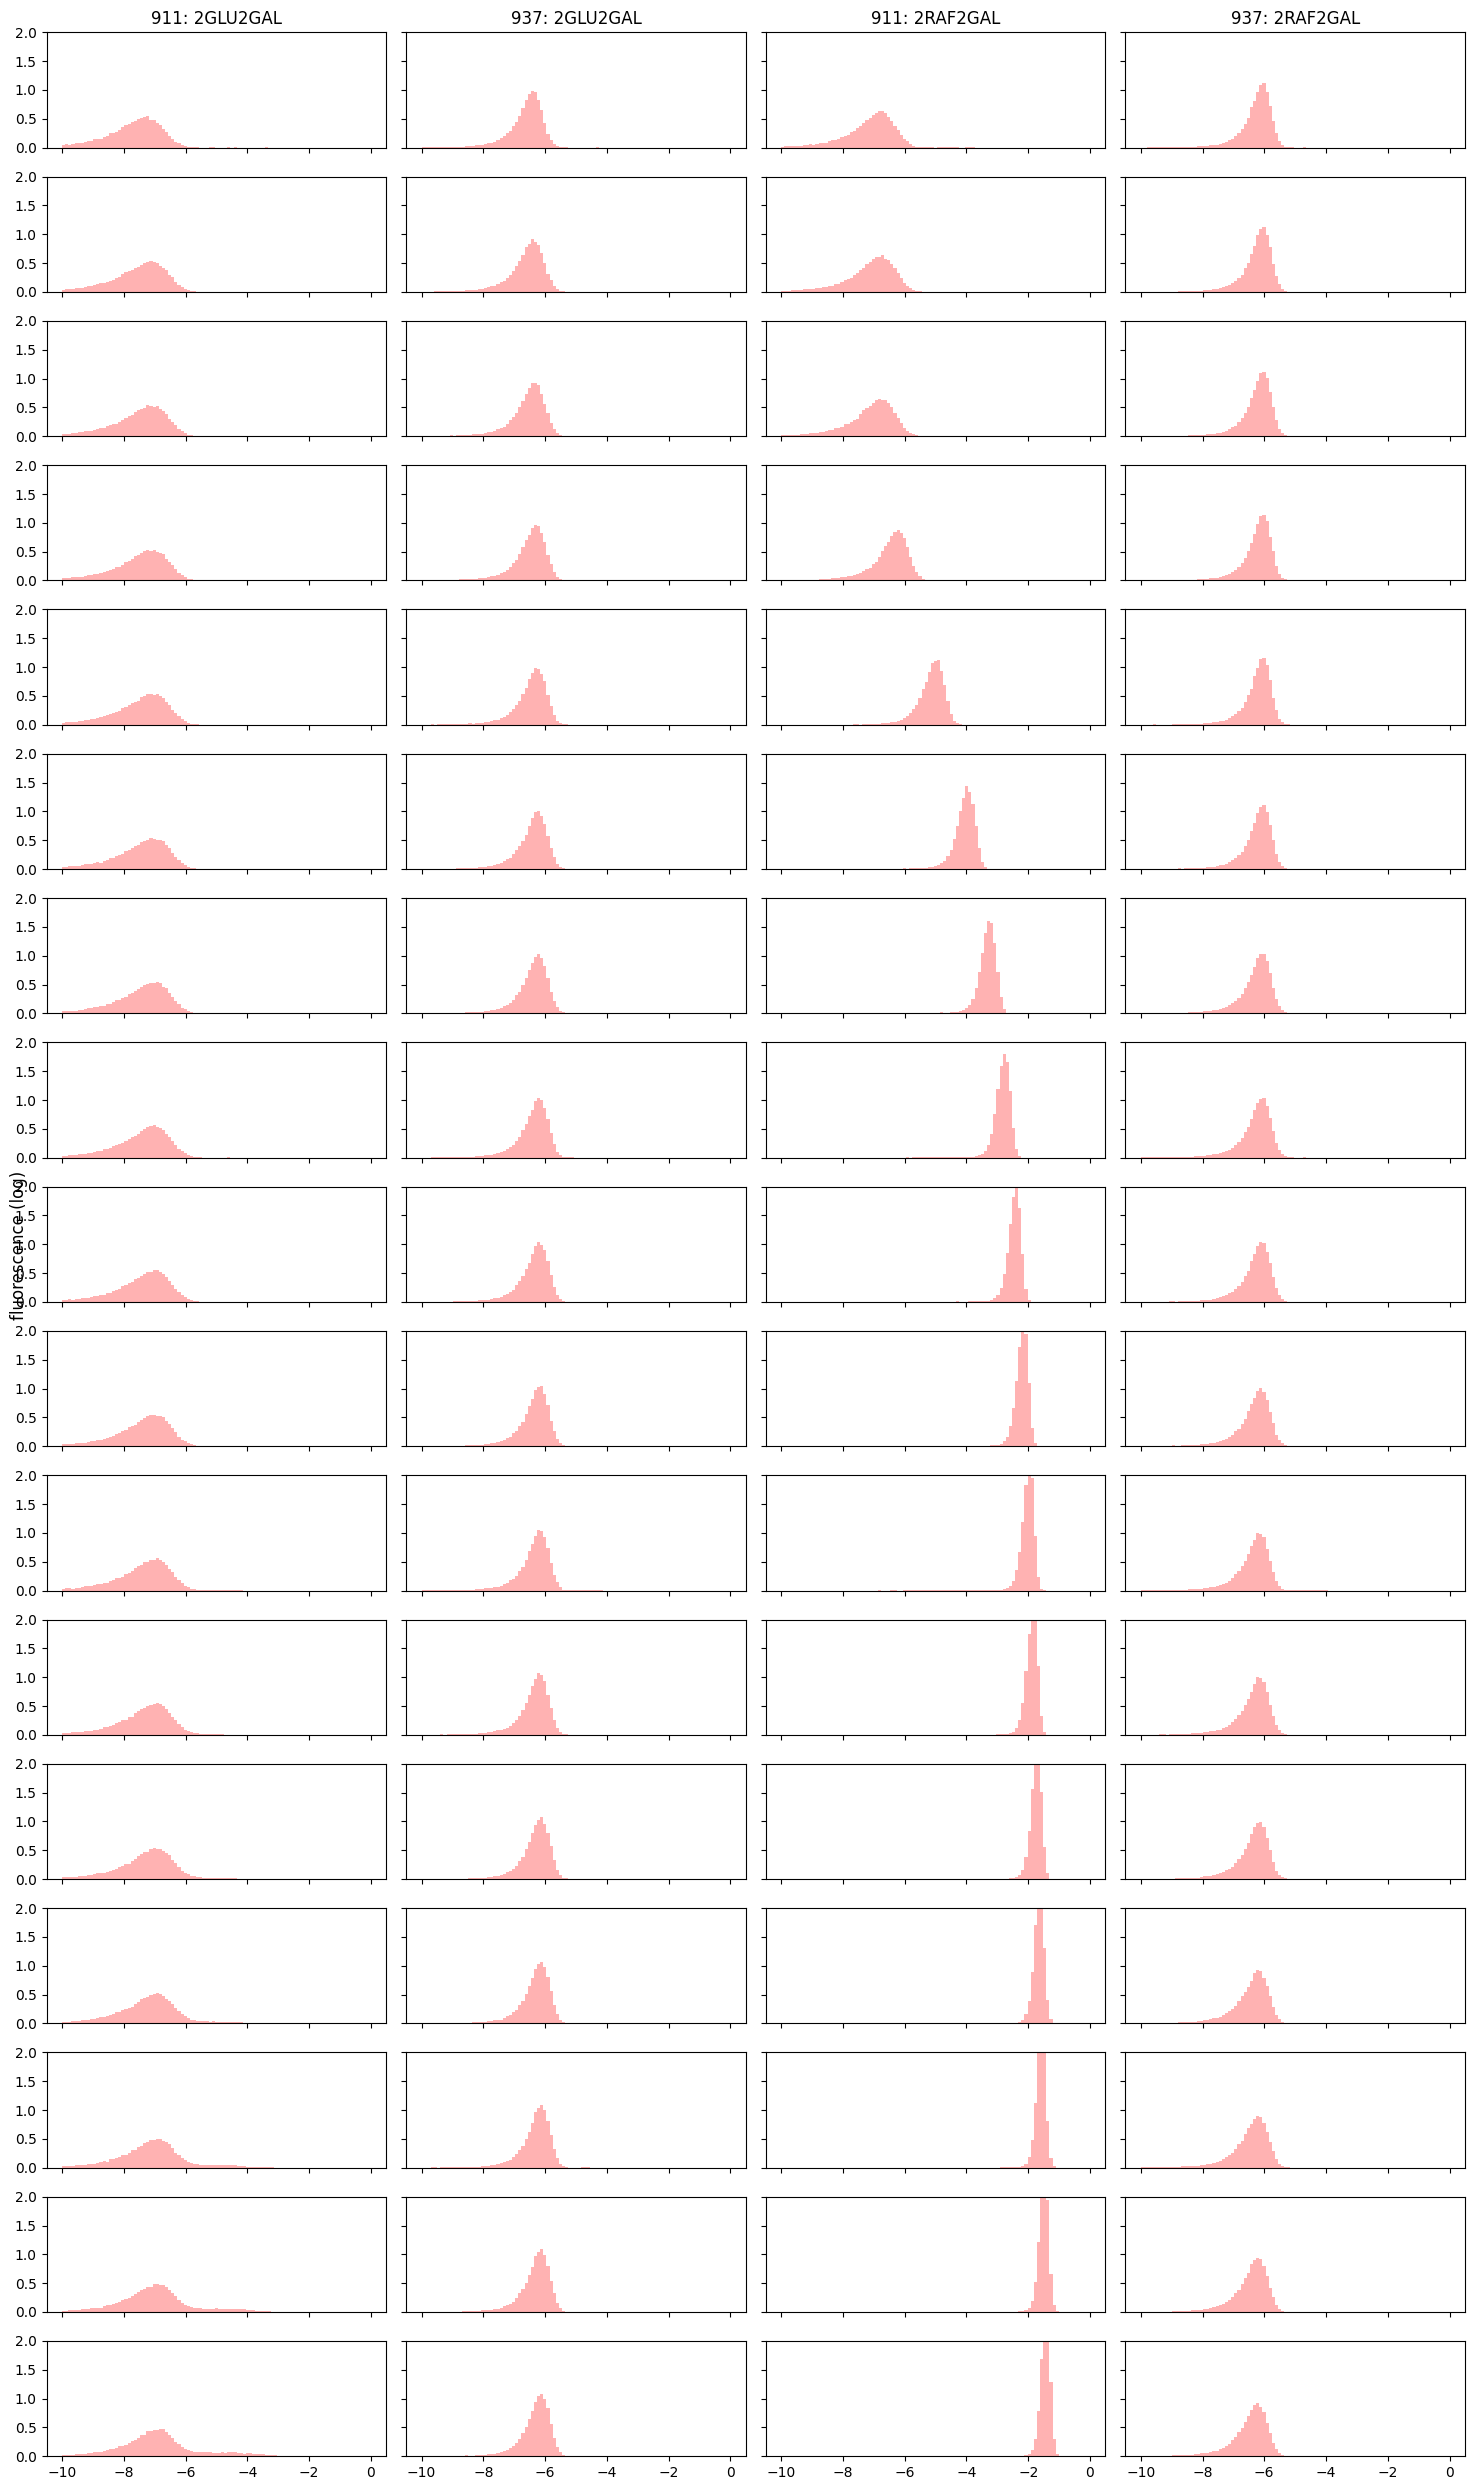

In [18]:
#create a grid
nrows=len(comb_df.time.unique())
#create a list with different time + strain combinations
condition_strain_combs=list(itertools.product(comb_df.condition.unique(),comb_df.strain.unique()))
#this is the different columns we need for our dataframe
ncols=len(condition_strain_combs)

# channel:
channel='FarRed_norm'

fig,axes=plt.subplots(nrows=nrows,ncols=ncols,figsize=(15,25), facecolor='white')

for (condition, strain),x in zip(condition_strain_combs,range(ncols)):
    
    df = comb_df[
        (comb_df['condition']==condition)
        & (comb_df['strain']==strain)
    ]
    
    for time,y in zip(sorted(comb_df.time.unique()),range(nrows)):
                      
        sT_df=df[df['time']==time]
        sT_df = sT_df[sT_df[channel]>0]
        
        #create the plot
        axes[y,x].hist(np.log(sT_df[channel]), bins=np.linspace(-10, 0, 100), alpha=0.3, density=True, color='red')
        
        #make sure the ylim is same for each plot
        axes[y,x].set_ylim(0,2)
        
        #call the image_clean_up function
        clean_up_mulitplot(axes,y,x)
        

            
#add one giant ylabel
fig.supylabel('fluorescence (log)')

plt.tight_layout()

#uncomment the following line to save your image
plt.savefig('multiplot_induction_2.png')

In [19]:
# 